In [1]:
import keras
import quandl
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

/home/chris/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [3]:
raw_data = quandl.get('BITFINEX/BTCUSD')

## See the data

In [4]:
raw_data.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369


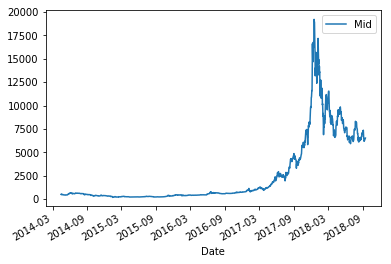

In [5]:
raw_data.drop(['High','Low','Last','Bid','Ask','Volume'],axis=1).plot.line()

## Feat eng

In [6]:
data = raw_data.drop(['High','Low','Last','Bid','Ask'],axis=1)

In [7]:
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data['year'] = data.index.year

In [8]:
print('DPs: ', data.shape[0])
data.head()

DPs:  1582


,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2014-04-15,504.23500,21013.584774,15,1,4,2014
2014-04-16,537.50000,29633.358705,16,2,4,2014
2014-04-17,507.02000,20709.783819,17,3,4,2014
2014-04-18,483.77000,10458.045243,18,4,4,2014
2014-04-19,505.01065,8963.618369,19,5,4,2014


## Le train & Le test
### + feats labels split

In [9]:
train_size = int(len(data) * 0.90)
test_size = len(data) - train_size

In [10]:
label = ['Mid']
feats = [c for c in data.columns if c not in label]

In [11]:
train = data[:train_size]
test = data[train_size:]

In [12]:
len(train), len(test), len(train) + len(test)

(1423, 159, 1582)

In [13]:
X_train = train[feats]
y_train = train[label]
X_test = test[feats]
y_test = test[label]

In [14]:
reg = RandomForestRegressor(max_depth=5, random_state=0)

In [15]:
reg.fit(X_train, y_train)

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
trainPredict = reg.predict(X_train)
testPredict = reg.predict(X_test)

In [17]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, testPredict))

# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y_test, testPredict)))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, testPredict))

Mean squared error: 819933.26
Root Mean squared error: 905.50
R2 score: 0.20


In [18]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)

In [19]:
plt.rcParams['figure.figsize'] = [20, 10]

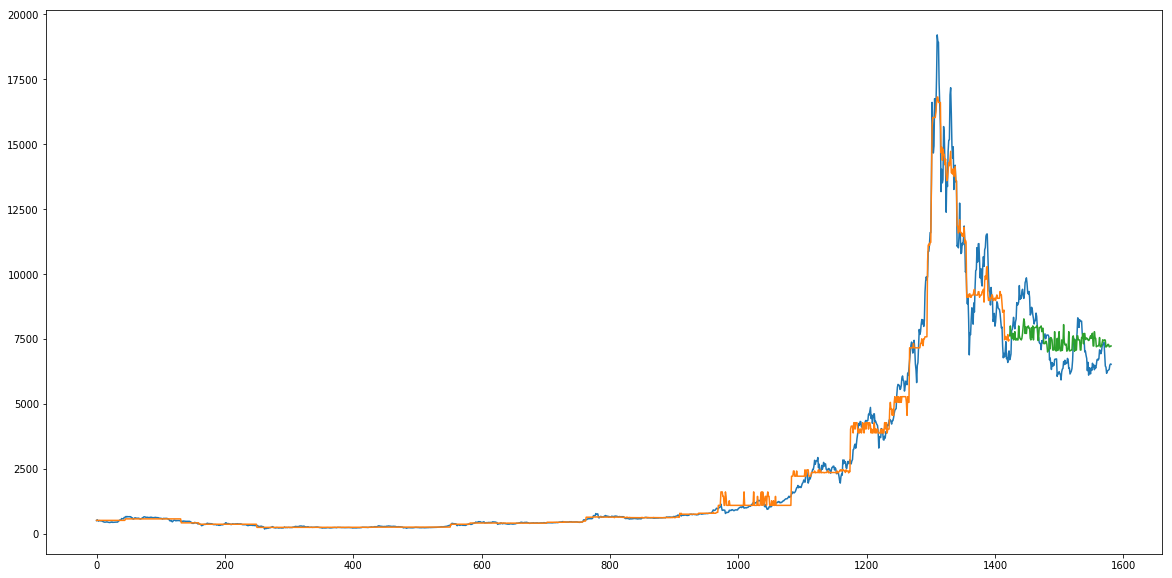

In [20]:
# plot baseline and predictions
plt.plot(raw_data.reset_index().drop(['High','Low','Last','Bid','Ask','Volume','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)

plt.show()

## Shitty...
### Try to remove first years, those were other times

In [21]:
print('DPs: ', data.shape[0])
data.head()

DPs:  1582


,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2014-04-15,504.23500,21013.584774,15,1,4,2014
2014-04-16,537.50000,29633.358705,16,2,4,2014
2014-04-17,507.02000,20709.783819,17,3,4,2014
2014-04-18,483.77000,10458.045243,18,4,4,2014
2014-04-19,505.01065,8963.618369,19,5,4,2014


In [22]:
recent_data = data.iloc[969:]
recent_data.head()

,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2017-01-01,966.995,7147.774423,1,6,1,2017
2017-01-02,998.290,13440.456264,2,0,1,2017
2017-01-03,1019.450,21804.197216,3,1,1,2017
2017-01-04,1038.500,14128.625714,4,2,1,2017
2017-01-05,1138.650,53698.692041,5,3,1,2017


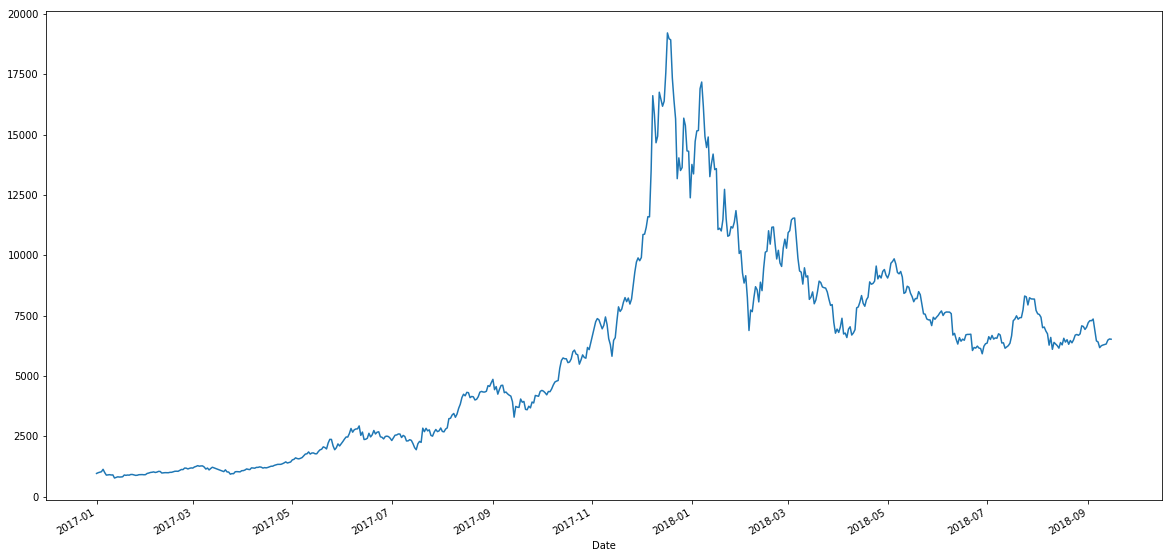

In [23]:
recent_data.Mid.plot.line()

## Much better
### try again

In [24]:
train_size = int(len(recent_data) * 0.90)
test_size = len(recent_data) - train_size
label = ['Mid']
feats = [c for c in recent_data.columns if c not in label]
train = recent_data[:train_size]
test = recent_data[train_size:]
len(train), len(test), len(train) + len(test)

(551, 62, 613)

In [25]:
X_train = train[feats]
y_train = train[label]
X_test = test[feats]
y_test = test[label]

In [26]:
reg = RandomForestRegressor(max_depth=5, random_state=0)
reg.fit(X_train, y_train)

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
trainPredict = reg.predict(X_train)
testPredict = reg.predict(X_test)

In [28]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, testPredict))
# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y_test, testPredict)))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, testPredict))

Mean squared error: 728304.88
Root Mean squared error: 853.41
R2 score: -0.87


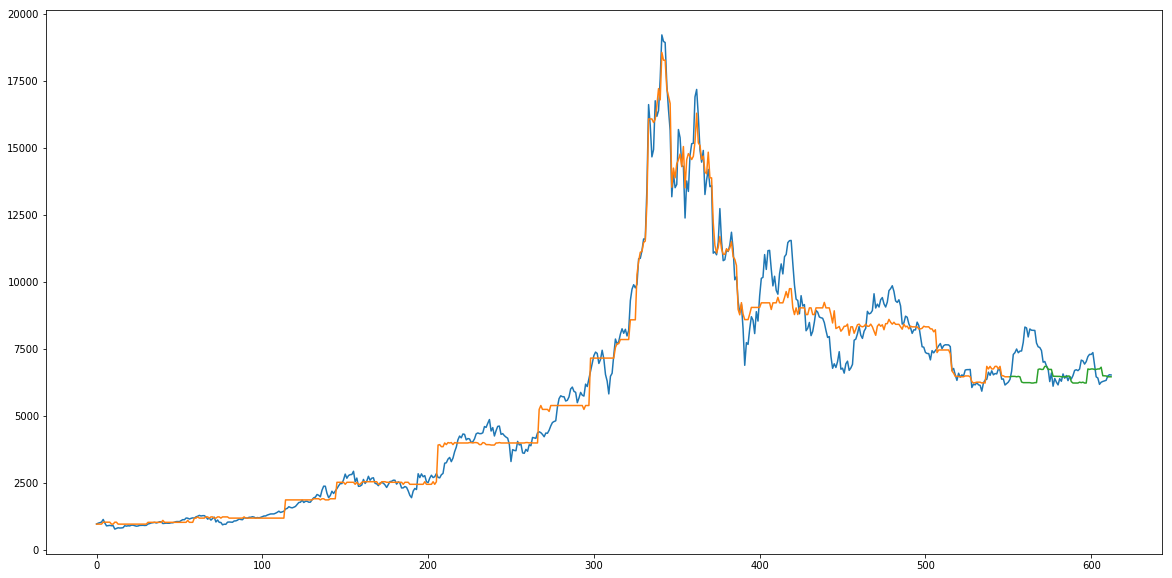

In [29]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)
# plot baseline and predictions
plt.plot(recent_data.reset_index().drop(['Volume','day','dayofweek','month','year','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

## Much better <3
### MLP?

In [30]:
#mean = recent_data.Volume.mean(axis=0)
#std = recent_data.Volume.std(axis=0)

#recent_data.Volume = (recent_data.Volume - mean) / std
mean = recent_data.mean(axis=0)
std = recent_data.std(axis=0)

# zscore normalization
recent_data = ( recent_data - mean ) / std
recent_data.head()

,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2017-01-01,-1.223794,-1.117004,-1.641538,1.505013,-1.507053,-0.84896
2017-01-02,-1.215914,-0.884555,-1.528538,-1.496852,-1.507053,-0.84896
2017-01-03,-1.210586,-0.575602,-1.415538,-0.996541,-1.507053,-0.84896
2017-01-04,-1.205789,-0.859134,-1.302538,-0.496230,-1.507053,-0.84896
2017-01-05,-1.180570,0.602568,-1.189539,0.004081,-1.507053,-0.84896


In [41]:
recent_data.tail()

,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2018-09-11,0.120863,-0.772804,-0.511540,-0.996541,1.003337,1.175991
2018-09-12,0.125698,-0.787023,-0.398541,-0.496230,1.003337,1.175991
2018-09-13,0.166416,-0.676516,-0.285541,0.004081,1.003337,1.175991
2018-09-14,0.178528,-0.773378,-0.172541,0.504392,1.003337,1.175991
2018-09-15,0.175808,-1.067961,-0.059541,1.004702,1.003337,1.175991


In [31]:
train_size = int(len(recent_data) * 0.90)
test_size = len(recent_data) - train_size
label = ['Mid']
feats = [c for c in recent_data.columns if c not in label]
train = recent_data[:train_size]
test = recent_data[train_size:]
len(train), len(test), len(train) + len(test)

(551, 62, 613)

In [32]:
X_train = train[feats]
y_train = train[label]
X_test = test[feats]
y_test = test[label]

In [33]:
model = Sequential()
model.add(Dense(32, input_dim=5, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='nadam')

In [34]:
model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1)

Epoch 1/300
551/551 [==============================] - 1s 946us/step - loss: 1.0006
Epoch 2/300
551/551 [==============================] - 0s 152us/step - loss: 0.7113
Epoch 3/300
551/551 [==============================] - 0s 91us/step - loss: 0.4139
Epoch 4/300
551/551 [==============================] - 0s 130us/step - loss: 0.2804
Epoch 5/300
551/551 [==============================] - 0s 133us/step - loss: 0.2114
Epoch 6/300
551/551 [==============================] - 0s 153us/step - loss: 0.1802
Epoch 7/300
551/551 [==============================] - 0s 154us/step - loss: 0.1465
Epoch 8/300
551/551 [==============================] - 0s 146us/step - loss: 0.1268
Epoch 9/300
551/551 [==============================] - 0s 139us/step - loss: 0.1233
Epoch 10/300
551/551 [==============================] - 0s 305us/step - loss: 0.1032
Epoch 11/300
551/551 [==============================] - 0s 241us/step - loss: 0.0998
Epoch 12/300
551/551 [==============================] - 0s 131us/step - los

551/551 [==============================] - 0s 210us/step - loss: 0.0197
Epoch 98/300
551/551 [==============================] - 0s 111us/step - loss: 0.0206
Epoch 99/300
551/551 [==============================] - 0s 148us/step - loss: 0.0206
Epoch 100/300
551/551 [==============================] - 0s 225us/step - loss: 0.0222
Epoch 101/300
551/551 [==============================] - 0s 224us/step - loss: 0.0197
Epoch 102/300
551/551 [==============================] - 0s 221us/step - loss: 0.0215
Epoch 103/300
551/551 [==============================] - 0s 128us/step - loss: 0.0200
Epoch 104/300
551/551 [==============================] - 0s 106us/step - loss: 0.0197
Epoch 105/300
551/551 [==============================] - 0s 90us/step - loss: 0.0204
Epoch 106/300
551/551 [==============================] - 0s 193us/step - loss: 0.0205
Epoch 107/300
551/551 [==============================] - 0s 245us/step - loss: 0.0189
Epoch 108/300
551/551 [==============================] - 0s 167us/step 

551/551 [==============================] - 0s 86us/step - loss: 0.0193
Epoch 193/300
551/551 [==============================] - 0s 158us/step - loss: 0.0164
Epoch 194/300
551/551 [==============================] - 0s 97us/step - loss: 0.0144
Epoch 195/300
551/551 [==============================] - 0s 137us/step - loss: 0.0154
Epoch 196/300
551/551 [==============================] - 0s 116us/step - loss: 0.0147
Epoch 197/300
551/551 [==============================] - 0s 149us/step - loss: 0.0129
Epoch 198/300
551/551 [==============================] - 0s 330us/step - loss: 0.0142
Epoch 199/300
551/551 [==============================] - 0s 274us/step - loss: 0.0155
Epoch 200/300
551/551 [==============================] - 0s 256us/step - loss: 0.0158
Epoch 201/300
551/551 [==============================] - 0s 214us/step - loss: 0.0140
Epoch 202/300
551/551 [==============================] - 0s 95us/step - loss: 0.0127
Epoch 203/300
551/551 [==============================] - 0s 219us/step 

551/551 [==============================] - 0s 234us/step - loss: 0.0150
Epoch 288/300
551/551 [==============================] - 0s 176us/step - loss: 0.0107
Epoch 289/300
551/551 [==============================] - 0s 141us/step - loss: 0.0128
Epoch 290/300
551/551 [==============================] - 0s 235us/step - loss: 0.0103
Epoch 291/300
551/551 [==============================] - 0s 158us/step - loss: 0.0100
Epoch 292/300
551/551 [==============================] - 0s 181us/step - loss: 0.0095
Epoch 293/300
551/551 [==============================] - 0s 149us/step - loss: 0.0095
Epoch 294/300
551/551 [==============================] - 0s 90us/step - loss: 0.0093
Epoch 295/300
551/551 [==============================] - 0s 177us/step - loss: 0.0094
Epoch 296/300
551/551 [==============================] - 0s 137us/step - loss: 0.0096
Epoch 297/300
551/551 [==============================] - 0s 195us/step - loss: 0.0105
Epoch 298/300
551/551 [==============================] - 0s 127us/ste

In [35]:
# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 0.01 MSE (0.10 RMSE)
Test Score: 0.60 MSE (0.78 RMSE)


In [36]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [37]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)

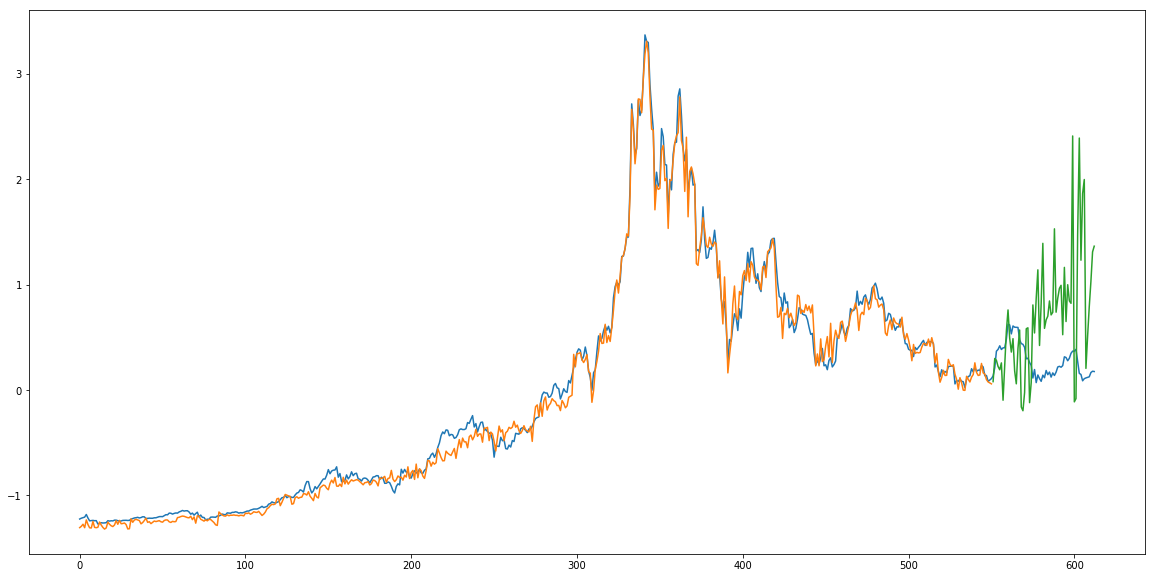

In [38]:
# plot baseline and predictions
plt.plot(recent_data.reset_index().drop(['Volume','day','dayofweek','month','year','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

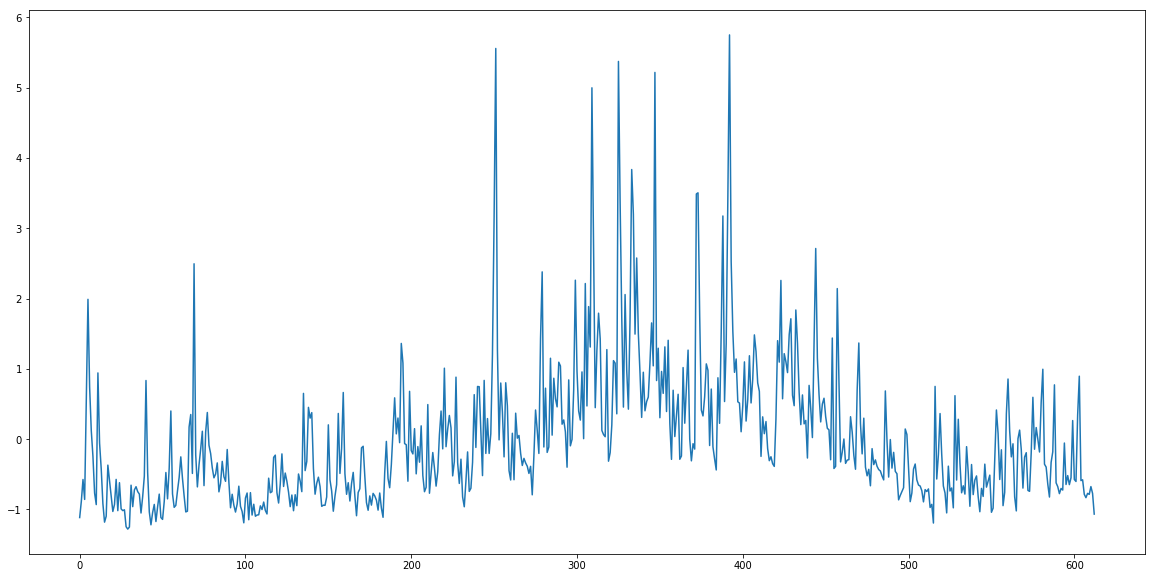

In [39]:
plt.plot(recent_data.reset_index().drop(['Mid','day','dayofweek','month','year','Date'],axis=1))

In [40]:
X_train.head()

,Volume,day,dayofweek,month,year
Date,,,,,
2017-01-01,-1.117004,-1.641538,1.505013,-1.507053,-0.84896
2017-01-02,-0.884555,-1.528538,-1.496852,-1.507053,-0.84896
2017-01-03,-0.575602,-1.415538,-0.996541,-1.507053,-0.84896
2017-01-04,-0.859134,-1.302538,-0.496230,-1.507053,-0.84896
2017-01-05,0.602568,-1.189539,0.004081,-1.507053,-0.84896
